In [2]:
# Starter cell\nprint('Notebook created successfully ✅')

In [3]:
# 1. Setup & imports
import pandas as pd
import numpy as np #I think we dont need this one
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

print("Environment ready ✅")


Environment ready ✅


In [4]:
# 2. Load the Shark Attacks dataset

file_path = "https://www.sharkattackfile.net/spreadsheets/GSAF5.xls"   # points to the data folder
df = pd.read_excel(file_path)

# Show first 5 rows
df.head()


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,6th September,2025.0,Unprovoked,Australia,NSW,Long Reef Sydney,Surfing,Mercury Psillaskis,M,57,Both legs and arm severed,Y,0930hrs,Great White Shark,Todd Smith: Andy Currie: Simon De Marchi: Kevi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1st September,2025.0,Unprovoked,USA,Florida,Horseshoe reef Key Largo,Snorkeling,Richard Burrows,M,8,Bite to leg,N,1524hrs,Not stated,Todd Smith: US SUN: NY Post: The Guardian: Peo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30th August,2025.0,Unprovoked,USA,Texas,Galveston,Swimming,Harper Ochoa,F,8,Bite to leg,N,Not stated,Not stated,Bob Myatt GSAF : People:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,None sustained board severly damaged,N,0730hrs,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,Severe injuries no detail,N,1300hrs,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail()

print (df)

               Date    Year        Type             Country  \
0     6th September  2025.0  Unprovoked           Australia   
1     1st September  2025.0  Unprovoked                 USA   
2       30th August  2025.0  Unprovoked                 USA   
3       18th August  2025.0  Unprovoked           Australia   
4       17th August  2025.0  Unprovoked             Bahamas   
...             ...     ...         ...                 ...   
7040    Before 1903     0.0  Unprovoked           AUSTRALIA   
7041    Before 1903     0.0  Unprovoked           AUSTRALIA   
7042      1900-1905     0.0  Unprovoked                 USA   
7043      1883-1889     0.0  Unprovoked              PANAMA   
7044      1845-1853     0.0  Unprovoked  CEYLON (SRI LANKA)   

                                  State                             Location  \
0                                   NSW                     Long Reef Sydney   
1                               Florida             Horseshoe reef Key Largo   
2  

In [6]:
# 3. Quick inspection of dataset
df.info()
df.isna().sum().sort_values(ascending=False).head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7045 entries, 0 to 7044
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            7045 non-null   object 
 1   Year            7043 non-null   float64
 2   Type            7027 non-null   object 
 3   Country         6995 non-null   object 
 4   State           6560 non-null   object 
 5   Location        6478 non-null   object 
 6   Activity        6460 non-null   object 
 7   Name            6826 non-null   object 
 8   Sex             6466 non-null   object 
 9   Age             4051 non-null   object 
 10  Injury          7010 non-null   object 
 11  Fatal Y/N       6484 non-null   object 
 12  Time            3519 non-null   object 
 13  Species         3914 non-null   object 
 14  Source          7025 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href            6796 non-null   o

Unnamed: 21       7044
Unnamed: 22       7043
Time              3526
Species           3131
Age               2994
Activity           585
Sex                579
Location           567
Fatal Y/N          561
State              485
href formula       251
href               249
Case Number.1      248
Case Number        247
pdf                246
original order     246
Name               219
Country             50
Injury              35
Source              20
dtype: int64

In [7]:
df.isna().sum()

Date                 0
Year                 2
Type                18
Country             50
State              485
Location           567
Activity           585
Name               219
Sex                579
Age               2994
Injury              35
Fatal Y/N          561
Time              3526
Species           3131
Source              20
pdf                246
href formula       251
href               249
Case Number        247
Case Number.1      248
original order     246
Unnamed: 21       7044
Unnamed: 22       7043
dtype: int64

In [8]:
# Cell 4 — Drop duplicate rows and show counts before/after
print("Shape before dedup:", df.shape)

# Count duplicated rows
num_dup = df.duplicated().sum()
print("Number of exact duplicate rows:", num_dup)

# Drop duplicates (in-place)
#df = df.drop_duplicates().reset_index(drop=True)

#print("Shape after dedup: ", df.shape)
# Show first few rows to confirm
#df.head()

#No duplicates found, no need to drop duplicates at this point

Shape before dedup: (7045, 23)
Number of exact duplicate rows: 0


In [9]:
# Cell 5 — Standardize column names
# Save original columns for reference
original_cols = df.columns.tolist()
print("Original columns:", original_cols)

# Standardize: strip, lower, replace spaces with underscores, remove weird chars
df.columns = (
    df.columns
      .astype(str)
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
      .str.replace(r"[^\w_]", "", regex=True) #keep only alphanumeric and underscores
)

print("Standardized columns:", df.columns.tolist())

# Optional: preview a few columns and types
df.iloc[:, :10].head()  # show first 10 columns (or change slice)


Original columns: ['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ', 'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22']
Standardized columns: ['date', 'year', 'type', 'country', 'state', 'location', 'activity', 'name', 'sex', 'age', 'injury', 'fatal_yn', 'time', 'species', 'source', 'pdf', 'href_formula', 'href', 'case_number', 'case_number1', 'original_order', 'unnamed_21', 'unnamed_22']


,date,year,type,country,state,location,activity,name,sex,age
0,6th September,2025.0,Unprovoked,Australia,NSW,Long Reef Sydney,Surfing,Mercury Psillaskis,M,57
1,1st September,2025.0,Unprovoked,USA,Florida,Horseshoe reef Key Largo,Snorkeling,Richard Burrows,M,8
2,30th August,2025.0,Unprovoked,USA,Texas,Galveston,Swimming,Harper Ochoa,F,8
3,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?
4,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63


In [10]:
# Cell 6 — Clean age column
age_col_candidates = [c for c in df.columns if "age" in c]
print("Age column candidates found:", age_col_candidates)

if len(age_col_candidates) == 0:
    print("No column with 'age' in its name found. Please check column names.")
else:
    # choose the first candidate as age column
    age_col = age_col_candidates[0]
    print("Using age column:", age_col)

    # 1) Inspect a sample of unique values to understand formats
    sample_vals = df[age_col].dropna().astype(str).sample(min(20, df.shape[0]), random_state=1).unique()
    print("Sample age values (raw):", sample_vals)

    # 2) Extract first number found in the string (handles "23", "23 yrs", "about 23", "23-24", etc.)
    df[age_col + "_clean"] = (
        df[age_col].astype(str)
                    .str.extract(r"(\d{1,3})")  # capture 1-3 digit numbers
                    .astype(float) #is it better as a int?
    )

    #MAYBE WE SHOULD ALSO PUT SOME CONDITION TO DEAL WITH "TEENS" OR "CHILD" VALUES?

    # 3) If extraction produced NaN for many rows, you can try alternative approaches
    missing_before = df[age_col].isna().sum()
    missing_after = df[age_col + "_clean"].isna().sum()
    print(f"Missing in original '{age_col}':", missing_before)
    print(f"Missing in cleaned '{age_col}_clean':", missing_after) #increased missing values after cleaning

    # 4) Quick sanity checks and value distribution
    print("Age summary (clean):")
    display(df[age_col + "_clean"].describe())

    # 5) Preview original vs cleaned for first 10 non-null rows
    preview = df[[age_col, age_col + "_clean"]].dropna().head(10)
    display(preview)


Age column candidates found: ['age']
Using age column: age
Sample age values (raw): ['17' '24' '22' '27' '10' '32' '19' '14' '34' '33' '36' '18' 'teen' '42'
 '30' '20s' '23']
Missing in original 'age': 2994
Missing in cleaned 'age_clean': 3039
Age summary (clean):


count    4006.000000
mean       28.128058
std        14.654552
min         1.000000
25%        17.000000
50%        24.000000
75%        37.000000
max        87.000000
Name: age_clean, dtype: float64

,age,age_clean
0,57,57.0
1,8,8.0
2,8,8.0
4,63,63.0
6,9,9.0
7,39,39.0
8,19,19.0
9,7,7.0
10,85,85.0
12,69,69.0


In [11]:
#Cell 7 - NEW CELL FROM SOFIA - Drop last two columns
df = df.drop(columns=["unnamed_22", "unnamed_21"])

df.head()

,date,year,type,country,state,location,activity,name,sex,age,injury,fatal_yn,time,species,source,pdf,href_formula,href,case_number,case_number1,original_order,age_clean
0,6th September,2025.0,Unprovoked,Australia,NSW,Long Reef Sydney,Surfing,Mercury Psillaskis,M,57,Both legs and arm severed,Y,0930hrs,Great White Shark,Todd Smith: Andy Currie: Simon De Marchi: Kevi...,NaN,NaN,NaN,NaN,NaN,NaN,57.0
1,1st September,2025.0,Unprovoked,USA,Florida,Horseshoe reef Key Largo,Snorkeling,Richard Burrows,M,8,Bite to leg,N,1524hrs,Not stated,Todd Smith: US SUN: NY Post: The Guardian: Peo...,NaN,NaN,NaN,NaN,NaN,NaN,8.0
2,30th August,2025.0,Unprovoked,USA,Texas,Galveston,Swimming,Harper Ochoa,F,8,Bite to leg,N,Not stated,Not stated,Bob Myatt GSAF : People:,NaN,NaN,NaN,NaN,NaN,NaN,8.0
3,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,None sustained board severly damaged,N,0730hrs,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,Severe injuries no detail,N,1300hrs,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,63.0


In [12]:
# Cell 8 — Standardize sex/gender column

sex_candidates = [c for c in df.columns if c in ['sex', 'gender'] or 'sex' in c or 'gender' in c]
print("Sex column candidates:", sex_candidates)

if not sex_candidates:
    print("No sex/gender column found. Skip this step.")
else:
    sex_col = sex_candidates[0]
    print("Using sex column:", sex_col)
    
    # Normalize strings
    df[sex_col] = df[sex_col].astype(str).str.strip().str.lower()
    
    # Map common variants to 'Male', 'Female', keep others as 'unknown'
    mapping = {
        'm': 'Male', 'male': 'Male', 'man': 'Male',
        'f': 'Female', 'female': 'Female', 'woman': 'Female',
        'unknown': 'unknown', 'nan': None, 'none': None
    }
    df['sex_clean'] = df[sex_col].map(mapping).fillna(
                        df[sex_col].apply(lambda x: 'Male' if x.lower().startswith('m') else
                                                  'Female' if x.lower().startswith('f') else
                                                  'unknown')
                      )
    
    # Final tidy (replace possible 'none'/'nan')
    df['sex_clean'] = df['sex_clean'].replace({'None': None, 'nan': None})
    
    # Preview counts
    display(df[sex_col].value_counts(dropna=False).head(10))
    print("Cleaned sex value counts:")
    display(df['sex_clean'].value_counts(dropna=False))


Sex column candidates: ['sex']
Using sex column: sex


sex
m        5654
f         807
nan       579
n           2
lli         1
m x 2       1
.           1
Name: count, dtype: int64

Cleaned sex value counts:


sex_clean
Male       5655
Female      807
unknown     583
Name: count, dtype: int64

In [13]:
# Cell 9 — Group activities into buckets (surfing, swimming, diving, fishing, boating, other)

# Find activity column
activity_candidates = [c for c in df.columns if 'activity' in c or 'activity' in c.lower()]
activity_candidates = activity_candidates or [c for c in df.columns if 'act' in c.lower()]
print("Activity candidates:", activity_candidates)

if not activity_candidates:
    print("No activity column found; check column names.")
else:
    act_col = activity_candidates[0]
    print("Using activity column:", act_col)
    
    # Normalize text
    df[act_col] = df[act_col].astype(str).str.lower().str.strip()
    
    # Define mapping function using keywords
    def map_activity_text(text):
        if pd.isna(text) or text in ['nan', 'none', '']:
            return 'unknown'
        t = text.lower()
        if any(k in t for k in ['surf', 'surfer']):
            return 'surfing'
        if any(k in t for k in ['swim', 'snorkel', 'wade', 'swimmer']):
            return 'swimming'
        if any(k in t for k in ['div', 'scuba', 'snork', 'freediv', 'free dive']):
            return 'diving'
        if any(k in t for k in ['fish', 'fishing', 'angling']):
            return 'fishing'
        if any(k in t for k in ['boat', 'kayak', 'ship', 'vessel', 'sea plane', 'sail']):
            return 'boating'
        if any(k in t for k in ['stand up paddle', 'paddle', 'paddleboard', 'paddling']): #added paddling
            return 'paddleboard'
        # Add more heuristics as needed
        return 'other'
    
    df['activity_group'] = df[act_col].apply(map_activity_text)
    display(df[[act_col, 'activity_group']].dropna().head(20))
    print("Activity group counts:")
    display(df['activity_group'].value_counts())


Activity candidates: ['activity']
Using activity column: activity


,activity,activity_group
0,surfing,surfing
1,snorkeling,swimming
2,swimming,swimming
3,surfing,surfing
4,spearfishing,fishing
5,fishing,fishing
6,surfing,surfing
7,wading,other
8,kayaking,boating
9,swimming,swimming


Activity group counts:


activity_group
other          1453
surfing        1452
swimming       1403
fishing        1234
diving          639
unknown         587
boating         234
paddleboard      43
Name: count, dtype: int64

In [14]:
df_act_na = df[(df["activity_group"] == 'unknown') | (df["activity_group"] == 'other')]
df_act_na.shape

#df_act_na.to_csv(r"C:\Users\Sofia\Documents\IronHack\Module2\Project\data-cleaning-pandas\data\df_act_na.csv")

(2040, 24)

In [15]:
# Cell 10 — Derive fatal flag and some useful indicators

# Find candidate fatal column names
fatal_candidates = [c for c in df.columns if 'fatal' in c or 'death' in c or 'fatal_(y' in c]
print("Fatal candidates:", fatal_candidates)

if not fatal_candidates:
    print("No explicit fatal column found. Attempting to infer from likely columns.")
    # try to infer from a common column name 'fatal_(y/n)'
    if 'fatal_(y_n)' in df.columns:
        fc = 'fatal_(y_n)'
    elif 'fatal_(y/n)' in df.columns:
        fc = 'fatal_(y/n)'
    else:
        fc = None
else:
    fc = fatal_candidates[0]
    print("Using fatal column:", fc)

if fc:
    df[fc] = df[fc].astype(str).str.strip().str.upper()
    df['fatal_flag'] = df[fc].map(lambda x: 1 if x.startswith('Y') else (0 if x.startswith('N') else None))
else:
    # If no column, create based on 'outcome' or similar heuristics
    df['fatal_flag'] = None

# Create a simple 'is_young' feature (age < 30) if age_clean exists
age_col_clean = [c for c in df.columns if c.endswith('_clean') and 'age' in c]
if age_col_clean:
    ac = age_col_clean[0]
    df['is_young'] = df[ac].apply(lambda x: 1 if pd.notnull(x) and x < 30 else 0 if pd.notnull(x) else None)
    print("Using age clean column:", ac)
else:
    print("No cleaned age column found; skip young flag.")

# Quick check
display(df[['fatal_flag']].value_counts(dropna=False))


Fatal candidates: ['fatal_yn']
Using fatal column: fatal_yn
Using age clean column: age_clean


fatal_flag
0.0           5481
1.0           1484
NaN             80
Name: count, dtype: int64

In [16]:
df["fatal_yn"]

0       Y
1       N
2       N
3       N
4       N
       ..
7040    Y
7041    Y
7042    Y
7043    Y
7044    Y
Name: fatal_yn, Length: 7045, dtype: object

In [17]:
df_inj_na = df[df["injury"].isna()] #just to see the NA values for injury

df_inj_na.shape #35 NAs in the injury column

(35, 26)

In [18]:
# Cell NEW SOFIA - SCORE FOR INJURY SEVERITY

def injury_score(row):
    x = str(row["fatal_yn"]).lower()
    y = str(row["injury"]).lower()
    fatal_terms = ['fatal', 'death', 'dead', 'drown', 'killed', 'mortality', 'perished', 'succumbed', 'expired', 'missing', 'scaveng', 'remains']
    if any(flag in x for flag in ["y", "f"]) or any(term in y for term in fatal_terms):
        return 4
    elif any(term in y for term in ['none', 'no', 'uninjured', 'unharmed', 'bump', 'escaped', 'safe', 'evaded', 'avoided', 'untouched', 'survive']):
        return 0
    elif any(term in y for term in ['severe', 'serious', 'bad', 'major', 'critical', 'amputat', 'both', 'lost', 'extensive', 'life-threatening', 'trauma', 'mutilated', 'disfigured', 'shattered', 'fracture', 'hemorrhage', 'severt', 'remove', 'moul']):
        return 3
    elif any(term in y for term in ['bit', 'nipped', 'injur', 'wound', 'puncture', 'gash', 'deep', 'hospitalized', 'treated', 'almost', 'recovered', 'abraded', 'broke']):
        return 2
    elif any(term in y for term in ['minor', 'scratch', 'bruise', 'cut', 'lacerat', 'abrasion', 'graze', 'nick', 'scrap', 'superficial', 'slight', 'small', 'mark', 'struck']):
        return 1
        #else:
        #return 0  # or some other value for unclassified injuries

df["injury_score"] = df.apply(injury_score, axis=1)

df_na_score = df[df["injury_score"].isna()]
print(df_na_score.shape)
df.head()

#df_na_score.to_csv(r"C:\Users\Sofia\Documents\IronHack\Module2\Project\data-cleaning-pandas\data\injury_score_na.csv")

(142, 27)


,date,year,type,country,state,location,activity,name,sex,age,injury,fatal_yn,time,species,source,pdf,href_formula,href,case_number,case_number1,original_order,age_clean,sex_clean,activity_group,fatal_flag,is_young,injury_score
0,6th September,2025.0,Unprovoked,Australia,NSW,Long Reef Sydney,surfing,Mercury Psillaskis,m,57,Both legs and arm severed,Y,0930hrs,Great White Shark,Todd Smith: Andy Currie: Simon De Marchi: Kevi...,NaN,NaN,NaN,NaN,NaN,NaN,57.0,Male,surfing,1.0,0.0,4.0
1,1st September,2025.0,Unprovoked,USA,Florida,Horseshoe reef Key Largo,snorkeling,Richard Burrows,m,8,Bite to leg,N,1524hrs,Not stated,Todd Smith: US SUN: NY Post: The Guardian: Peo...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,Male,swimming,0.0,1.0,2.0
2,30th August,2025.0,Unprovoked,USA,Texas,Galveston,swimming,Harper Ochoa,f,8,Bite to leg,N,Not stated,Not stated,Bob Myatt GSAF : People:,NaN,NaN,NaN,NaN,NaN,NaN,8.0,Female,swimming,0.0,1.0,2.0
3,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,surfing,Brad Ross,m,?,None sustained board severly damaged,N,0730hrs,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,surfing,0.0,NaN,0.0
4,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,spearfishing,Not stated,m,63,Severe injuries no detail,N,1300hrs,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,Male,fishing,0.0,0.0,0.0


In [19]:
# David's cell - Added the Danger-O-Meter visualization
value = df["injury_score"].mean()
import plotly.graph_objects as go
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = value,
    title = {"text": "Danger-o-Meter"},
    gauge = {
        'axis': {'range': [0, 4], 'tickvals': [0, 1, 2, 3, 4], 'ticktext': ["No", "Minor", "Moderate", "Severe", "Fatal"]},
        'bar': {'color': "darkred", 'thickness': 0.3},  # thinner pointer-like bar
        'steps': [
            {'range': [0, 1], 'color': "green"},
            #{'range': [1, 2], 'color': "lightgreen"},
            {'range': [1, 2], 'color': "yellow"},
            {'range': [2, 3], 'color': "orange"},
            {'range': [3, 4], 'color': "red"}
        ]
    }
))
fig.show()

In [ ]:
value_us = df["injury_score"][df["country"] == "USA"].mean()
import plotly.graph_objects as go
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = value_us,
    title = {"text": "Danger-o-Meter"},
    gauge = {
        'axis': {'range': [0, 4], 'tickvals': [0, 1, 2, 3, 4], 'ticktext': ["No", "Minor", "Moderate", "Severe", "Fatal"]},
        'bar': {'color': "darkred", 'thickness': 0.3},  # thinner pointer-like bar
        'steps': [
            {'range': [0, 1], 'color': "green"},
            {'range': [1, 2], 'color': "yellow"},
            {'range': [2, 3], 'color': "orange"},
            {'range': [3, 4], 'color': "red"}
        ]
    }
))
fig.show()

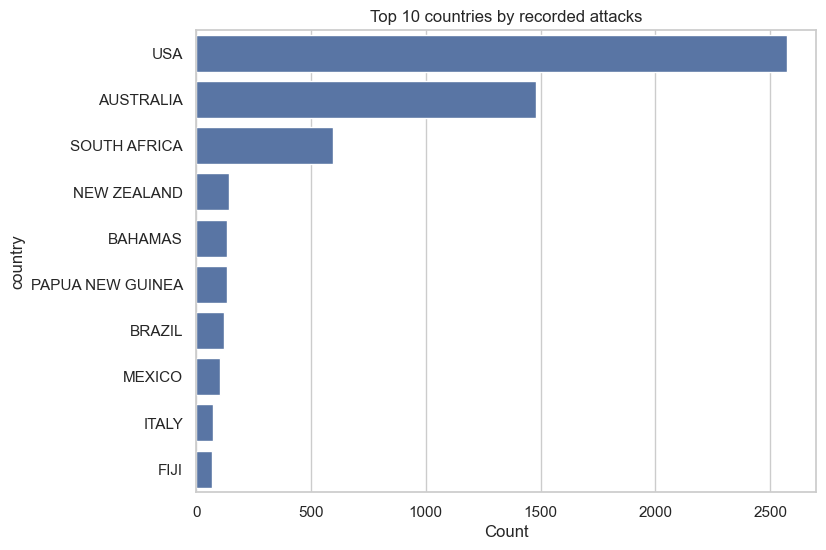

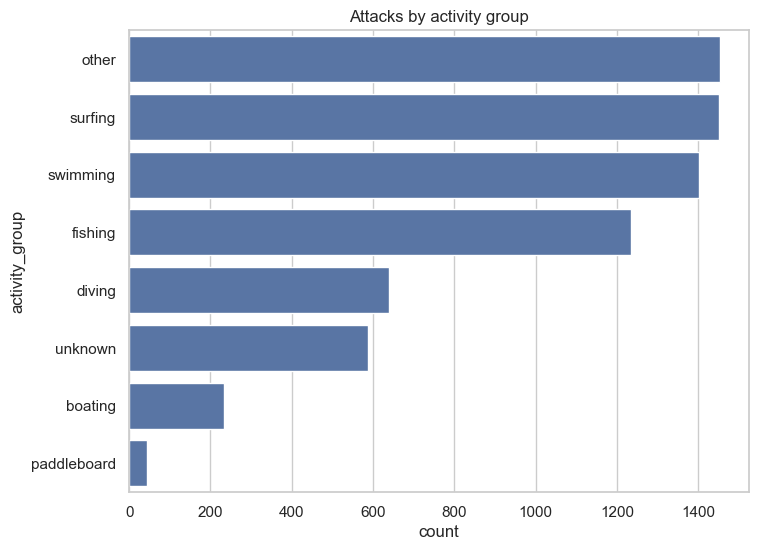

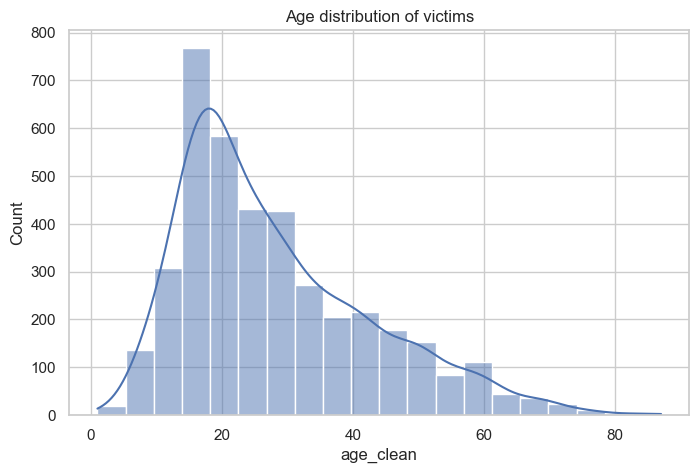

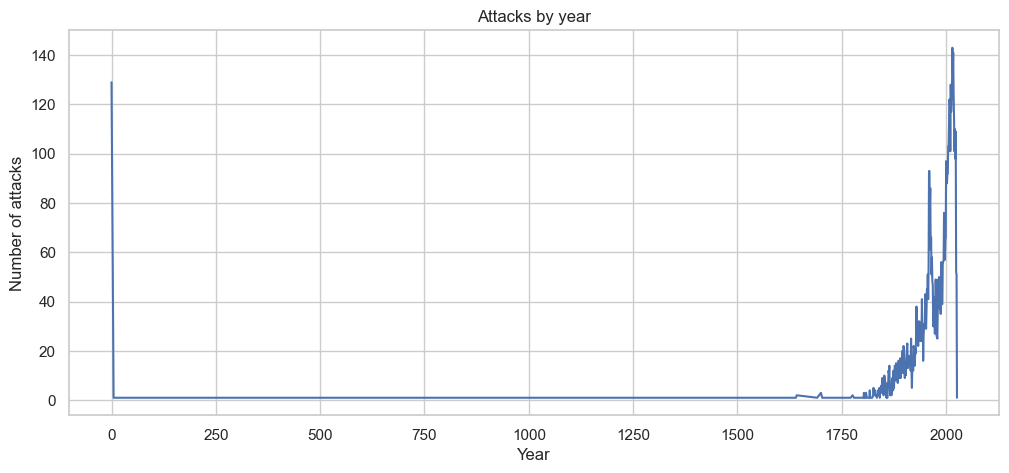

In [18]:
# Cell 11 — Basic EDA visualizations

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Top countries (defensive column name)
country_col = [c for c in df.columns if 'country' in c]
country_col = country_col[0] if country_col else None

if country_col:
    top_countries = df[country_col].value_counts().nlargest(10)
    plt.figure(figsize=(8,6))
    sns.barplot(x=top_countries.values, y=top_countries.index)
    plt.title("Top 10 countries by recorded attacks")
    plt.xlabel("Count")
    plt.show()
else:
    print("Country column not found.")

# Activity groups
if 'activity_group' in df.columns:
    plt.figure(figsize=(8,6))
    sns.countplot(y='activity_group', data=df, order=df['activity_group'].value_counts().index)
    plt.title("Attacks by activity group")
    plt.show()
else:
    print("No activity_group column to plot.")

# Age distribution
age_col = age_col_clean[0] if age_col_clean else None
if age_col:
    plt.figure(figsize=(8,5))
    sns.histplot(df[age_col].dropna(), bins=20, kde=True)
    plt.title("Age distribution of victims")
    plt.show()
else:
    print("No cleaned age column for histogram.")

# Attacks over time (year)
if 'year' in df.columns:
    attacks_by_year = df['year'].value_counts().sort_index()
    plt.figure(figsize=(12,5))
    attacks_by_year.plot()
    plt.title("Attacks by year")
    plt.ylabel("Number of attacks")
    plt.xlabel("Year")
    plt.show()
else:
    print("No year column to plot.")


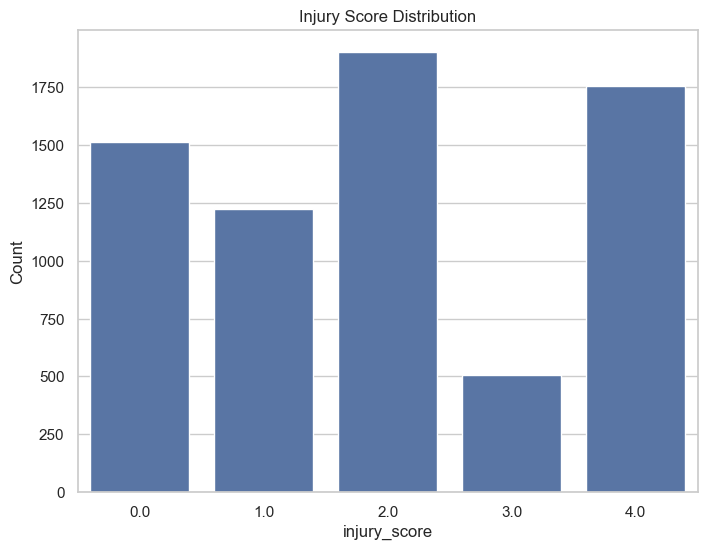

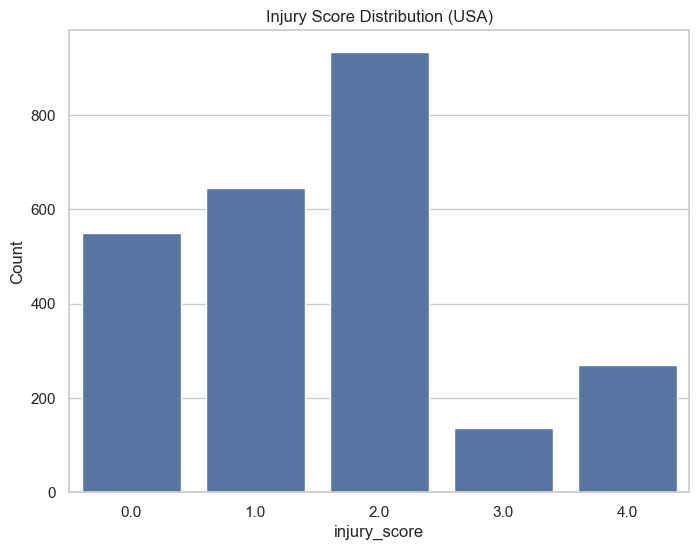

In [24]:
if "injury_score" in df.columns:
    score_numbers = df["injury_score"].value_counts()
    plt.figure(figsize=(8,6))
    sns.barplot(y=score_numbers.values, x=score_numbers.index)
    plt.title("Injury Score Distribution")
    plt.ylabel("Count")
    plt.show()
else:
    print("Injury Score column not found.")



if "injury_score" in df.columns:
    score_numbers_US = df["injury_score"][df["country"] == "USA"].value_counts()
    plt.figure(figsize=(8,6))
    sns.barplot(y=score_numbers_US.values, x=score_numbers_US.index)
    plt.title("Injury Score Distribution (USA)")
    plt.ylabel("Count")
    plt.show()
else:
    print("Injury Score column not found.")


In [ ]:
# SIMPLE: USA demographics (age, gender, activity) for shark attack project
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("GSAF5.csv", encoding="latin1")   # if file is next to notebook
print("Rows:", len(df))
df.head()
# Cell B — analysis + hospital summary
import os
import plotly.express as px
os.makedirs("reports", exist_ok=True)
usa = df[df["Country"].astype(str).str.contains("USA", na=False)].copy()
usa["Age_clean"] = pd.to_numeric(usa["Age"], errors="coerce")
bins = [0, 4, 14, 24, 34, 44, 54, 64, 74, 120]
labels = ["0-4","5-14","15-24","25-34","35-44","45-54","55-64","65-74","75+"]
usa["Age_group"] = pd.cut(usa["Age_clean"], bins=bins, labels=labels, include_lowest=True)
usa["Gender"] = usa["Sex"].astype(str).str.strip().str.upper().map({"M":"Male","F":"Female"}).fillna("Unknown")
usa["Activity_clean"] = usa["Activity"].astype(str).str.lower().str.strip()
usa["Fatal_flag"] = usa["Fatal Y/N"].astype(str).str.upper().str.strip().eq("Y")
summary = (
    usa.groupby(["Age_group","Gender","Activity_clean"], dropna=False)
       .agg(Incidents=("Age_clean","count"), Fatalities=("Fatal_flag","sum"))
       .reset_index()
)
summary["Fatal_rate"] = summary["Fatalities"]/summary["Incidents"]
out_csv = "reports/usa_demographics.csv"
summary.to_csv(out_csv, index=False)
print(f"Saved demographics summary → {out_csv}")
# visuals (Plotly)
fig1 = px.bar(usa.groupby(["Age_group","Gender"]).size().reset_index(name="Count"),
              x="Age_group", y="Count", color="Gender", category_orders={"Age_group": labels},
              title="USA Shark Attacks by Age Group and Gender")
fig1.show()
fig2 = px.bar(usa.groupby("Activity_clean").size().reset_index(name="Count").sort_values("Count", ascending=False).head(15),
              x="Activity_clean", y="Count", title="Top Activities in USA Shark Attacks")
fig2.update_xaxes(tickangle=45)
fig2.show()
pivot = (usa.groupby(["Age_group","Activity_clean"]).size().reset_index(name="Count")
           .pivot(index="Age_group", columns="Activity_clean", values="Count").fillna(0))
fig3 = px.imshow(pivot, labels=dict(x="Activity", y="Age group", color="Incidents"),
                 title="Heatmap: USA Shark Attacks (Age vs Activity)")
fig3.show()

In [ ]:
# === SEASONAL TRENDS ANALYSIS (USA Shark Attacks) ===
import pandas as pd
import matplotlib.pyplot as plt
# 1. Filter to USA
usa = df[df["Country"].astype(str).str.contains("USA", na=False)].copy()
# 2. Convert "Date" column to datetime
# (handles messy formats and missing values)
usa["Date_clean"] = pd.to_datetime(usa["Date"], errors="coerce")
# 3. Extract month and season
usa["Month"] = usa["Date_clean"].dt.month
month_names = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
usa["Month_name"] = usa["Month"].map(dict(enumerate(month_names, start=1)))
def assign_season(month):
    if month in [12,1,2]:
        return "Winter"
    elif month in [3,4,5]:
        return "Spring"
    elif month in [6,7,8]:
        return "Summer"
    elif month in [9,10,11]:
        return "Fall"
    else:
        return "Unknown"
usa["Season"] = usa["Month"].apply(assign_season)
# 4. Group counts by month and season
monthly_counts = usa["Month_name"].value_counts().reindex(month_names).fillna(0)
season_counts = usa["Season"].value_counts().reindex(["Winter","Spring","Summer","Fall"]).fillna(0)
# 5. Plot: Attacks by month
plt.figure(figsize=(10,4))
monthly_counts.plot(kind="bar")
plt.title("USA Shark Attacks by Month")
plt.ylabel("Number of Incidents")
plt.xlabel("Month")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
# 6. Plot: Attacks by season
plt.figure(figsize=(6,4))
season_counts.plot(kind="bar", color="orange")
plt.title("USA Shark Attacks by Season")
plt.ylabel("Number of Incidents")
plt.xlabel("Season")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
# 7. Print short hospital prep summary
print("\n=== HOSPITAL PREP SUMMARY (SEASONAL) ===")
if not monthly_counts.empty:
    peak_month = monthly_counts.idxmax()
    print(f":small_blue_diamond: Peak month: {peak_month} with {int(monthly_counts.max())} incidents.")
if not season_counts.empty:
    peak_season = season_counts.idxmax()
    print(f":small_blue_diamond: Peak season: {peak_season} ({int(season_counts.max())} incidents).")
print("\n:hospital: Implications:")
print("- Staff up ER and trauma units during peak months/seasons.")
print("- Schedule awareness campaigns before high-risk summer months.")
print("- Ensure blood supplies and surgical teams are ready in coastal hospitals during peaks.")

In [ ]:
# Category for map coloring
df_map['map_category'] = df_map.apply(
    lambda row: "USA" if row['country_clean'] == "United States"
    else "Other Countries",
    axis=1
)
# Filter only mapped rows
df_mapped = df_map[df_map['lat'].notna()]
# Create map with labels
fig_combined = px.scatter_mapbox(
    df_mapped,
    lat="lat",
    lon="lon",
    color="map_category",
    hover_name="location",  # This stays for hover details
    text="country_clean",   # This adds visible labels on map
    hover_data={
        "country_clean": True,
        "location_type": True,
        "lat": False,
        "lon": False
    },
    color_discrete_map={
        "USA": "red",
        "Other Countries": "orange",
    },
    zoom=1,
    height=700,
    title="Global Shark Attacks"
)
# Make markers larger and slightly transparent
fig_combined.update_traces(
    marker=dict(size=20, opacity=0.8),
    textposition="top center",  # This position labels above the dots
    textfont=dict(size=10, color="black")  # Here are the style labels
)
# Style
fig_combined.update_layout(mapbox_style="carto-positron")
# Display
fig_combined.show()


In [ ]:
# Cell 12 — Save the cleaned dataset (versioned)
output_path = "../data/shark_attacks_cleaned_v2.csv"
df.to_csv(output_path, index=False)
print("Saved cleaned dataset to:", output_path)


Saved cleaned dataset to: ../data/shark_attacks_cleaned_v2.csv
